In [1]:
from matplotlib import pyplot as plt
from systemclass import SNAIL,SNAIL_sweep,Cavity, SNAILC, SNAILC_sweep, SNAILCC, SNAILCC_sweep
import numpy as np

In [2]:
EJ = 30*2*np.pi
EC = 0.2*2*np.pi
beta = 0.45
ng = 0
ncut = 100
flux = 0.48
N = 2
dims = 40

# truncated_dim:int = 6
snail = SNAIL(EJ,EC,beta,ng,ncut,flux,N,dims)

omega_c1 = 4.25*2*np.pi
g_int1 = 0.15*2*np.pi
dimc1 = 5
cavity1 = Cavity(omega_c1,g_int1,dimc1)

omega_c2 = 4.55*2*np.pi
g_int2 = 0.15*2*np.pi
dimc2 = 5
cavity2 = Cavity(omega_c2,g_int2,dimc2)

snailcc = SNAILCC(snail,cavity1,cavity2)
fluxs = np.linspace(.4575, 0.5, 30)
snailcc_sweep = SNAILCC_sweep(snailcc,fluxs)

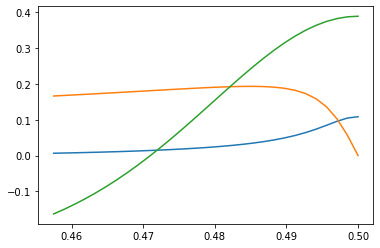

In [3]:
snail_sweep = SNAIL_sweep(snail,fluxs)
g4s = np.array(snail_sweep.g4s)
g3s = np.array(snail_sweep.g3s)
anhs = np.array(snail_sweep.anhs)
omegass  = np.array(snail_sweep.omegass)
plt.plot(fluxs,g4s/2/np.pi)
plt.plot(fluxs,g3s/2/np.pi)
plt.plot(fluxs,anhs/2/np.pi)

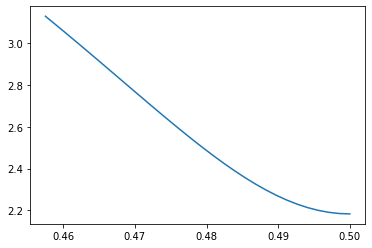

In [4]:
plt.plot(fluxs,omegass/2/np.pi)

In [5]:
snailc = SNAILC(snail,cavity1,)

In [6]:
crosskerr,snailc1_paras,snailc2_paras = snailcc_sweep.quantities_sweep()

In [7]:
np.array(snailc1_paras[3])/2/np.pi

array([-1.44147814e-05, -1.10067692e-05, -8.41081801e-06, -6.76031733e-06,
       -6.50438472e-06, -9.19385925e-06, -2.35040711e-05, -7.50729119e-03,
        3.72457259e-05,  2.64692439e-05,  2.34411816e-05,  2.23591254e-05,
        2.19695800e-05,  2.18330724e-05,  2.17466170e-05,  2.15947793e-05,
        2.13000986e-05,  2.08046775e-05,  2.00640948e-05,  1.90473550e-05,
        1.77403369e-05,  1.61512660e-05,  1.43167746e-05,  1.23067386e-05,
        1.02256995e-05,  8.20868133e-06,  6.40997668e-06,  4.98514891e-06,
        4.06876617e-06,  3.75246181e-06])

In [8]:
omega_cs1, omega_s, starkshifts1,selfkerrs1,sc_crosskerrs1,app= snailc1_paras
omega_cs2, omega_s, starkshifts2,selfkerrs2,sc_crosskerrs2,app= snailc2_paras

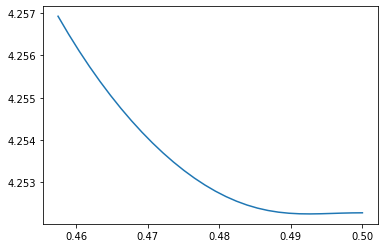

In [9]:
# plt.plot(snailc_sweep.fluxs[0:], (np.array(apps)/2/np.pi)[0:],label = 'app')
plt.plot(snailcc_sweep.fluxs,(np.array (omega_cs1)/2/np.pi),label = 'exact')
# plt.ylim(4.252,4.253)

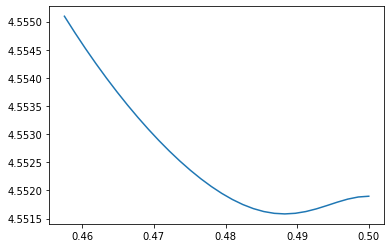

In [10]:
# plt.plot(snailc_sweep.fluxs[0:], (np.array(apps)/2/np.pi)[0:],label = 'app')
plt.plot(snailcc_sweep.fluxs,(np.array (omega_cs2)/2/np.pi),label = 'exact')

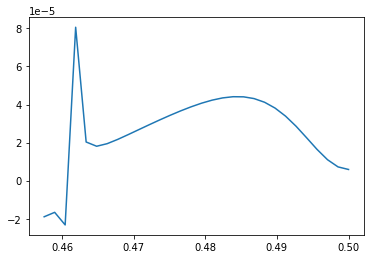

In [11]:
# plt.plot(snailc_sweep.fluxs[0:], (np.array(apps)/2/np.pi)[0:],label = 'app')
plt.plot(snailcc_sweep.fluxs[0:],(np.array (crosskerr)/2/np.pi)[0:],label = 'exact')
# plt.ylim(-1e-4,1e-4)

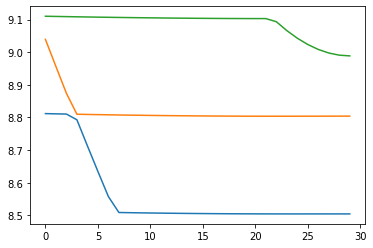

In [12]:
plt.plot(np.array(snailcc_sweep.spectrums)[:,8:11]/2/np.pi)

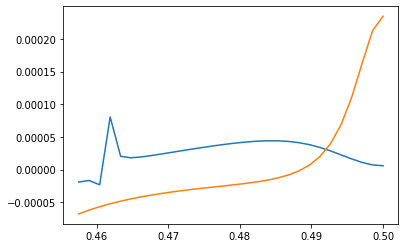

In [13]:
plt.plot(snailcc_sweep.fluxs, np.array(crosskerr)/2/np.pi)
# plt.ylim(-1e-4,1e-4)
g4s = np.array(snail_sweep.g4s)
g3s = np.array(snail_sweep.g3s)
omegas = np.array(snail_sweep.omegass)
omega_c1s = omega_c1*np.ones(len(g4s))
omega_c2s = omega_c2*np.ones(len(g4s))
delta_a = omega_c1*np.ones(len(g4s)) - omegas
delta_b = omega_c2*np.ones(len(g4s)) - omegas
omega_tilda = 1/(1/(omega_c1s-omega_c2s-omegas)+1/(-omega_c1s+omega_c2s-omegas)
               +1/(omega_c1s+omega_c2s-omegas)+1/(-omega_c1s-omega_c2s-omegas))
g_ints1 = np.array(snailcc_sweep.g_ints1)
g_ints2 = np.array(snailcc_sweep.g_ints2)
chi = ((24*g4s+36*g3s**2/omega_tilda)*(g_ints1/delta_a)**2*(g_ints2/delta_b)**2)
plt.plot(fluxs,chi/2/np.pi)
# plt.ylim(-1e-4,1e-4)

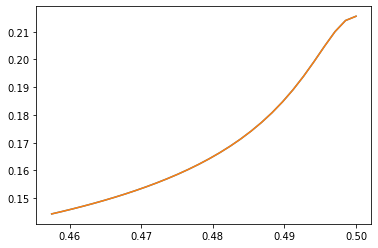

In [27]:
plt.plot(snailcc_sweep.fluxs, np.array(selfkerrs1)/2/np.pi)
plt.plot(snailcc_sweep.fluxs, np.array(selfkerrs2)/2/np.pi)
# plt.ylim(-2e-5,2e-5)

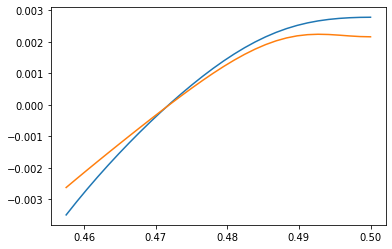

In [28]:
plt.plot(snailcc_sweep.fluxs, np.array(starkshifts1)/2/np.pi)
plt.plot(snailcc_sweep.fluxs, np.array(starkshifts2)/2/np.pi)
# plt.ylim(-1e-5,1e-5)